<p align="center"><b>DEEP LEARNING PARA PROCESSAMENTO DE LINGUAGEM E VISÃO</b></p>
<p align="justify"><b>Turma 1B - 2022/1</b></p>
<p><b>Trilha 6:</b> Tarefa (Peso 3)</p>
<p></p>
<p align='justify'>A mineração de textos é uma das principais atividades do processamento de linguagem natural. Diferentes domínios podem construir aplicações para entender melhor os dados textuais, como grandes portais jornalísticos, que constroem sistemas inteligentes para categorizar notícias.</p>
<p align='center'><img src=https://dhg1h5j42swfq.cloudfront.net/2021/05/11111019/image-255.png></p>
<p align='justify'>Nesta tarefa, você deverá desenvolver um categorizador de notícias utilizando redes neurais recorrentes. Para isso, utilize o conjunto de dados <i>Reuters</i> presente nativamente no TensorFlow-Keras.</p>



In [83]:
# Importando as Bibliotecas
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.datasets import reuters

import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt

In [84]:
# Carregando os dados
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)

In [85]:
# Total de Labels
total_labels = len(np.unique(y_train))
print(f'Total de rótulos: {total_labels}')

Total de rótulos: 46


In [86]:
# Recuperando os índices de mapeamento {dict} para seu índice no conjunto de dados do reuters.

word_index = reuters.get_word_index(path="reuters_word_index.json")

# Percorrendo o dicionário word_index e recuparando cada palavra com seu respectivo índice.
index_to_word = {}

for key, value in word_index.items():
    index_to_word[value] = key

# Imprimindo apenas alguns exemplos de Reviews com seus respectivos Labels
frases = []
for i in range(2):
    frase = ' '.join([index_to_word[x] for x in X_train[i]])
    frases.append(frase)
    for review, label in zip(frases, y_train):
        print('REVIEW: ', review[:200], "...")
        print('LABEL : ', label, '\n')

REVIEW:  the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states ...
LABEL :  3 

REVIEW:  the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states ...
LABEL :  3 

REVIEW:  the termination payment airport takes 6 of geological 3 6 602 begin up said fully bank expects commodity total is giant a of this takes of series termination payment airport mln a for capital 1 pre 50 ...
LABEL :  4 



In [87]:
# Pré-processando o conjunto de dados 
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')

y_train = tf.keras.utils.to_categorical(y_train, total_labels)
y_test = tf.keras.utils.to_categorical(y_test, total_labels)

In [88]:
# Construindo um Modelo

model = Sequential()
model.add(Dense(256,  activation='relu', input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(256,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))


NumEpochs = 10
BatchSize = 100

# Compilando o Modelo
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o Modelo
history = model.fit(X_train,y_train,epochs=NumEpochs,batch_size=BatchSize,verbose=1, validation_data=(X_test, y_test))



Epoch 1/10
90/90 [==============================] - 2s 17ms/step - loss: 1.8460 - accuracy: 0.5805 - val_loss: 1.2521 - val_accuracy: 0.7102
Epoch 2/10
90/90 [==============================] - 1s 15ms/step - loss: 1.0704 - accuracy: 0.7517 - val_loss: 1.0243 - val_accuracy: 0.7640
Epoch 3/10
90/90 [==============================] - 1s 15ms/step - loss: 0.7607 - accuracy: 0.8212 - val_loss: 0.9296 - val_accuracy: 0.7898
Epoch 4/10
90/90 [==============================] - 1s 15ms/step - loss: 0.5643 - accuracy: 0.8646 - val_loss: 0.9137 - val_accuracy: 0.7983
Epoch 5/10
90/90 [==============================] - 1s 15ms/step - loss: 0.4327 - accuracy: 0.8935 - val_loss: 0.9411 - val_accuracy: 0.8050
Epoch 6/10
90/90 [==============================] - 1s 15ms/step - loss: 0.3382 - accuracy: 0.9179 - val_loss: 0.9520 - val_accuracy: 0.8063
Epoch 7/10
90/90 [==============================] - 1s 16ms/step - loss: 0.2971 - accuracy: 0.9252 - val_loss: 0.9518 - val_accuracy: 0.8143
Epoch 8/10
90

In [89]:
score = model.evaluate(X_test, y_test, batch_size=BatchSize, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

23/23 [==============================] - 0s 4ms/step - loss: 1.0542 - accuracy: 0.8077
Test loss: 1.0542083978652954
Test accuracy: 0.8076580762863159


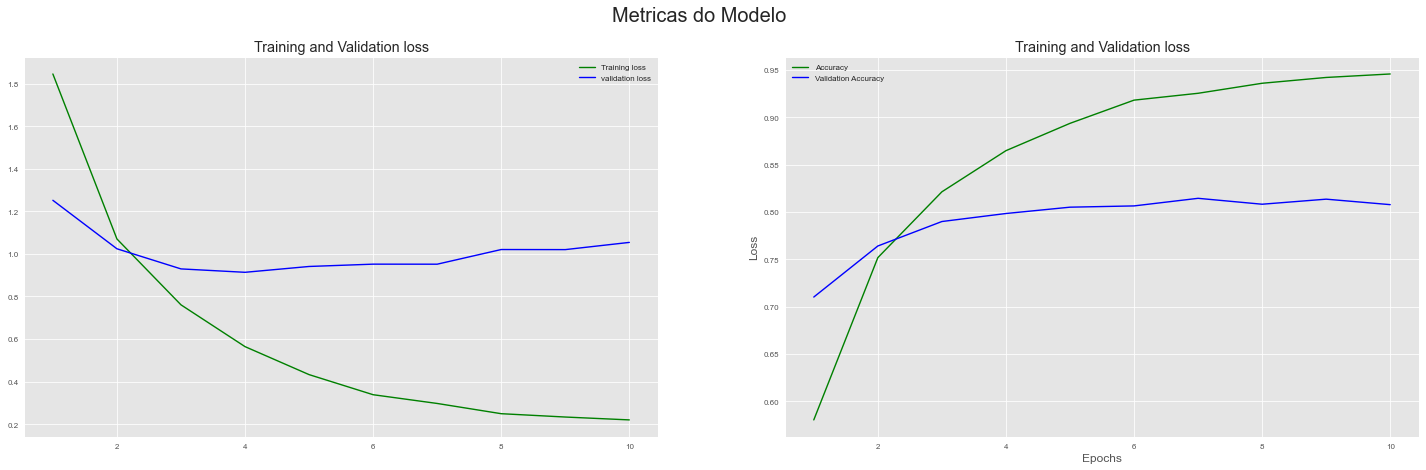

In [90]:
# Gerando a visualização das Métricas

fig, ax = plt.subplots(1,2, figsize=(25,7))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,NumEpochs+1)

fig.suptitle('Metricas do Modelo', fontsize=20)
ax[0].plot(epochs, loss_train, 'g', label='Training loss')
ax[0].plot(epochs, loss_val, 'b', label='validation loss')
ax[0].set_title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax[0].legend()


ax[1].plot(epochs, acc, 'g', label='Accuracy')
ax[1].plot(epochs, val_acc, 'b', label='Validation Accuracy')
ax[1].set_title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax[1].legend()

plt.show()

<h3>Conclusão</h3>
<p align='justify'>Neste exercício, foram utilizadas as bibliotecas <i>keras, tensorflow, numpy e matplotlib</i>. Para o pré-processamento dos dados foi utilizado a técnica de tokenização com a biblioteca <i>keras</i>. Em relação a construção do modelo, as métricas mais acuradas foram obtidas utilizando as camadas densas. As camadas SimpleRNN e LTSM não obtiveram o resultado satisfatório. Especificamente sobre esse ponto, existe um <a href=https://medium.com/@phuong_truong/classifying-reuters-newswire-topics-with-recurrent-neural-network-6b1a14b1804a>artigo</a> em que o autor tentou realizar a modelagem com as camadas SimplesRNN e LTSM e concluiu que havia <i>overfitting</i> e que o tamanho do conjunto de dados não permitiu obter uma acurácia melhor, compromentendo a performance dos algoritmos.</p>    